# Google Colab Lab Assignment -NLP

**Course Name:** Deel Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Prathamesh Lad

**Student ID:** 20220040131


**Group Members**: Prathamesh lad

Rushikesh Sawant

Krushna Aware


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [ ]:
# --- Install Required Libraries ---
!pip install nltk scikit-learn pandas

# --- Import Libraries ---
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# --- Download only needed NLTK Resources ---
nltk.download('stopwords')
nltk.download('wordnet')

# No punkt needed!

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# --- Dataset Selection ---
# You can choose any text dataset from the following link:
# Best Datasets for Text Classification: https://en.innovatiana.com/post/best-datasets-for-text-classification
# In this example, we'll use the SMS Spam Collection dataset.

# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])

# --- Explore Dataset ---
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nLabel Distribution:")
print(df['label'].value_counts())

# --- Text Preprocessing ---
# 1. Convert text to lowercase
df['text'] = df['text'].str.lower()

# 2. Tokenization WITHOUT PUNKT (using regex)
def simple_tokenize(text):
    # Only keep words (no punctuation), split by spaces
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

df['tokens'] = df['text'].apply(simple_tokenize)

# 3. Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# 4. Stemming using PorterStemmer
stemmer = PorterStemmer()
df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# 5. Lemmatization using WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# 6. Join tokens back into clean text
df['clean_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))

# --- Vectorization Techniques ---
# Using CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['clean_text'])

# Using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['clean_text'])

# Encode labels as 0 for 'ham' and 1 for 'spam'
y = df['label'].map({'ham': 0, 'spam': 1})

# --- Summary of Preprocessing ---
print("\nText preprocessing complete!")
print(f"Sample cleaned text: {df['clean_text'].head()}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


First 5 rows of the dataset:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Text preprocessing complete!
Sample cleaned text: 0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3   

**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Accuracy: 0.9839
Precision: 1.0000
Recall: 0.8792
F1 Score: 0.9357


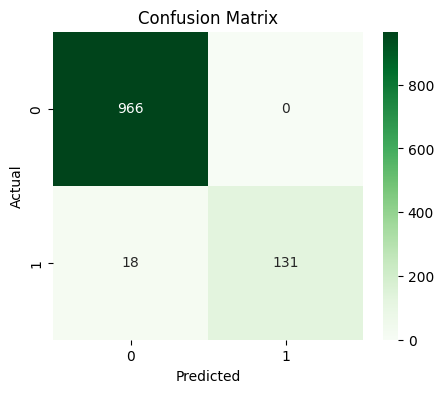

In [ ]:
#code for Part 2

# --- Splitting the Data ---
from sklearn.model_selection import train_test_split

# Divide the dataset into training and testing sets (80% training, 20% testing)
X_train_cv, X_test_cv, y_train, y_test = train_test_split(X_cv, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# --- Building the Classification Model ---
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model using CountVectorizer features
model.fit(X_train_cv, y_train)

# --- Model Prediction ---
y_pred = model.predict(X_test_cv)

# --- Model Evaluation ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate the model using various metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy, Precision, Recall, F1-Score
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Prathamesh lad, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Prathamesh Anil Lad


**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion